In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from datetime import date

# Name Basics

In [ ]:
name_basics = pd.read_csv("https://datasets.imdbws.com/name.basics.tsv.gz", sep = "\t")
name_basics.rename(columns = {'nconst':'name_id'}, inplace = True)              #Renaming to agreed 

In [ ]:
name_basics.head()

,name_id,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0072308,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0054452,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0080455,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0060827,tt0050986,tt0083922"


In [ ]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11337796 entries, 0 to 11337795
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   name_id            object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 519.0+ MB


# Replacing and filling missing values with "-1"

In [ ]:
# TODO: reduce the whole "fill -1" to one line code :)

In [ ]:
name_basics["birthYear"] = name_basics.birthYear.apply(lambda item: "-1" if item == "\\N" else item)

In [ ]:
name_basics["deathYear"] = name_basics.deathYear.apply(lambda item: "-1" if item == "\\N" else item)

In [ ]:
name_basics["knownForTitles"] = name_basics.knownForTitles.apply(lambda item: "-1" if item == "\\N" else item)

In [ ]:
name_basics['primaryProfession'].fillna("-1", inplace = True)

# Taking care of outliers

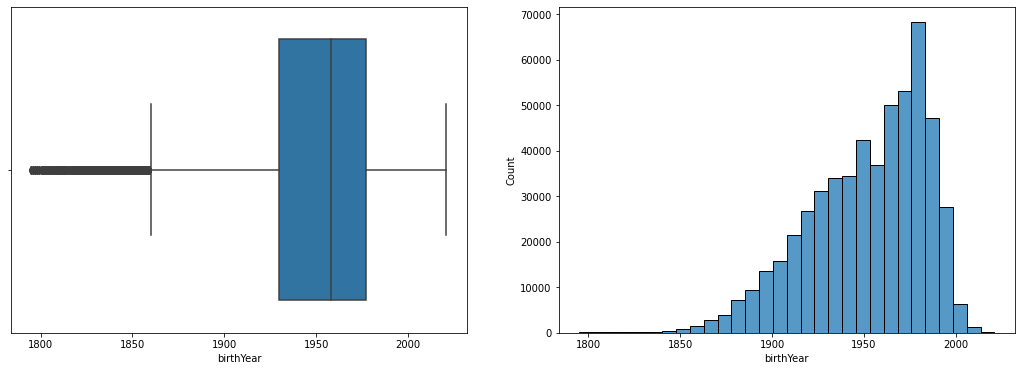

In [ ]:
name_basics2 = name_basics.astype({'birthYear': 'int'})
df_birthYear = (name_basics2[name_basics2["birthYear"] != -1]).copy()                  #df_birthYear to remove the -1's
df_birthYear2 = df_birthYear[df_birthYear['birthYear'] > 1794]                         #Taking the "ridiculous" outliers 

# TODO: the analysis on the outliers is missing, are they mistypes? Is the row completely wrong? What's happening?

fig, axes = plt.subplots(figsize = (18,6), nrows = 1, ncols = 2)
sns.boxplot(ax = axes[0], data = df_birthYear2, x ='birthYear')
sns.histplot(ax = axes[1], data = df_birthYear2, x='birthYear', bins = 30)
plt.show()

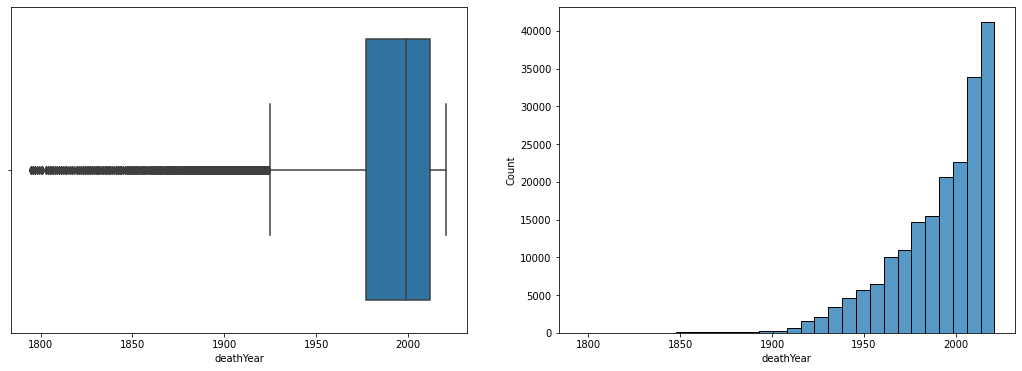

In [ ]:
name_basics3 = name_basics.astype({'deathYear':'int'})
df_deathYear = (name_basics3[name_basics3["deathYear"] != -1]).copy()
df_deathYear2 = df_deathYear[df_deathYear['deathYear'] > 1794]

fig, axes = plt.subplots(figsize = (18,6), nrows = 1, ncols = 2)
sns.boxplot(ax = axes[0], data = df_deathYear2, x ='deathYear')
sns.histplot(ax = axes[1], data = df_deathYear2, x='deathYear', bins = 30)
plt.show()

# Value counts and answering questions

In [ ]:
name_basics.primaryName.value_counts(dropna = False)
name_basics.primaryName.unique()    
#TODO: check if there is recurring name, just written differently (caps or small caps, only surname, ...)

array(['Fred Astaire', 'Lauren Bacall', 'Brigitte Bardot', ...,
       'Essias Loberg', 'Harikrishnan Rajan', 'Aayush Nair'], dtype=object)

In [ ]:
name_basics.birthYear.value_counts(dropna = False)                              #Original one cleaned

-1      10800160
1980        8987
1979        8779
1978        8770
1981        8707
          ...   
1598           1
1682           1
1658           1
1095           1
1506           1
Name: birthYear, Length: 506, dtype: int64

In [ ]:
df_birthYear2.birthYear.value_counts(dropna = False)                            #The one without outliers and -1

1980    8987
1979    8779
1978    8770
1981    8707
1982    8551
        ... 
1799       8
1798       8
1796       7
1795       7
1800       1
Name: birthYear, Length: 227, dtype: int64

In [ ]:
name_basics.deathYear.value_counts(dropna = False)                              #Original one cleaned

-1      11142577
2020        5974
2019        5220
2016        5100
2021        5078
          ...   
1800           1
1650           1
1773           1
1652           1
1471           1
Name: deathYear, Length: 443, dtype: int64

In [ ]:
df_deathYear2.deathYear.value_counts(dropna = False)                                      #The one without outliers and -1

2020    5974
2019    5220
2016    5100
2021    5078
2018    5032
        ... 
1819       1
1798       1
1815       1
1800       1
1818       1
Name: deathYear, Length: 226, dtype: int64

In [ ]:
name_basics.primaryProfession.value_counts(dropna = False)
# TODO do a value count for each primary profession, some of the lines here have multiple choices - to further develop
# name_basics.primaryProfession.nunique()
primary_single = name_basics.explode('primaryProfession')
primary_single.primaryProfession.value_counts()
primary_single.head()


,name_id,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0072308,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,-1,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0054452,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0080455,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0060827,tt0050986,tt0083922"


In [ ]:

name_basics.knownForTitles.value_counts(dropna = False)
# TODO: same as before, which one is the title with the highest amount of actors that are "known for title"?
# name_basics[name_basics['knownForTitles'] != '-1'].value_counts()
title_high = name_basics.explode('knownForTitles')
title_high.knownForTitles.value_counts()
#the title most mentioned is tt0123338. By checking the title_akas table, I checked that the title name with highest amount of actors known for it is '60 Minutes'

-1                                         2060798
tt0123338                                     6928
tt0486531                                     2782
tt0133302                                     2763
tt0206501                                     2560
                                            ...   
tt1935719,tt2438542,tt5743842                    1
tt5286444,tt5165344,tt6267944,tt7618184          1
tt2625948,tt2405740,tt2847592,tt0368555          1
tt13891782,tt5118580,tt0133691                   1
tt2171277,tt0902331                              1
Name: knownForTitles, Length: 4703652, dtype: int64

In [ ]:
name_basics.head()

,name_id,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0072308,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,-1,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0054452,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0080455,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0060827,tt0050986,tt0083922"


# Average age of actors

In [ ]:
today = date.today()
df_birthYear_final = df_birthYear2[df_birthYear2['deathYear'] == '-1'].copy()
df_birthYear_final = df_birthYear_final[df_birthYear_final['primaryProfession'].str.contains('actor|actress')].copy()
df_birthYear_final.head()
df_birthYear_final['age'] = today.year - df_birthYear_final["birthYear"]
df_birthYear_final = df_birthYear_final[df_birthYear_final['age'] < 100]


print(df_birthYear_final['age'].mean())                            
df_birthYear_final.head()

50.81668068119866


,name_id,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,age
2,nm0000003,Brigitte Bardot,1934,-1,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0054452,tt0056404",87
46,nm0000047,Sophia Loren,1934,-1,"actress,soundtrack","tt0076085,tt0060121,tt0058335,tt0054749",87
78,nm0000079,Raquel Welch,1940,-1,"actress,soundtrack,producer","tt0062708,tt0066115,tt0061653,tt0072281",81
83,nm0000084,Gong Li,1965,-1,actress,"tt0397535,tt0101640,tt0473444,tt0430357",56
86,nm0000087,Elena Koreneva,1953,-1,"actress,casting_director,soundtrack","tt0122969,tt0080912,tt5847740,tt7529350",68


In [ ]:
df_birthYear_final.sort_values(by = ['age'], ascending = False)
df_birthYear_final_mean 

,name_id,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,age
4202205,nm1584784,Inge Deutschkron,1922,-1,"actress,writer","tt0391588,tt0267247,tt1308439,tt0090015",99
9934602,nm8306647,Nikolay Serebrennikov,1922,-1,actor,"tt5902720,tt6087606,tt6354828,tt6235050",99
723095,nm0766462,Madhavapeddi Satyam,1922,-1,"music_department,actor,soundtrack","tt0279389,tt0259392,tt0259553,tt0263687",99
6828050,nm4557898,Holger Tångström,1922,-1,actor,"tt2658252,tt8313440,tt0092453",99
3940706,nm1311087,Yi Qin,1922,-1,"actress,writer,art_department","tt2097946,tt7018652,tt4747094,tt10466448",99
...,...,...,...,...,...,...,...
1801791,nm10913258,Shea Lightfoot,2019,-1,actor,"tt10805226,tt12167404",2
2993716,nm12122609,Adam James Sanderson,2020,-1,actor,tt12668798,1
2806589,nm11929892,Lilah Sykes,2020,-1,actress,"tt13273876,tt11918262,tt11271396,tt13288898",1
3373625,nm12515594,Noah Lira,2021,-1,"actor,cinematographer",-1,0


In [ ]:
# #Average age for actors
# df_birthYear_actors = df_birthYear2[df_birthYear2['deathYear'] == '-1'].copy()
# df_birthYear_actors = df_birthYear_actors[df_birthYear_actors['primaryProfession'].str.contains('actor')].copy()

# df_birthYear_actors['age'] = today.year - df_birthYear_actors["birthYear"]
# df_birthYear_actors = df_birthYear_actors[df_birthYear_actors['age'] < 100]

# df_birthYear_actors_mean = df_birthYear_actors['age'].mean()
# df_birthYear_actors_mean

52.19621188010544

In [ ]:
# #Average age for actresses

# df_birthYear_actresses = df_birthYear2[df_birthYear2['deathYear'] == '-1'].copy()
# df_birthYear_actresses = df_birthYear_actresses[df_birthYear_actresses['primaryProfession'].str.contains('actress')].copy()

# df_birthYear_actresses['age'] = today.year - df_birthYear_actresses["birthYear"]
# df_birthYear_actresses = df_birthYear_actresses[df_birthYear_actresses['age'] < 100]

# df_birthYear_actresses_mean = df_birthYear_actresses['age'].mean()
# df_birthYear_actresses_mean

49.01641055131359

In [ ]:
# #Merging the means
# d = {'Actors': df_birthYear_actors_mean, 'Actresses': df_birthYear_actresses_mean, 'Total' : df_birthYear_final_mean}
# df_merged_means = pd.DataFrame(data = d, index = [0])
# df_merged_means

NameError: ignored

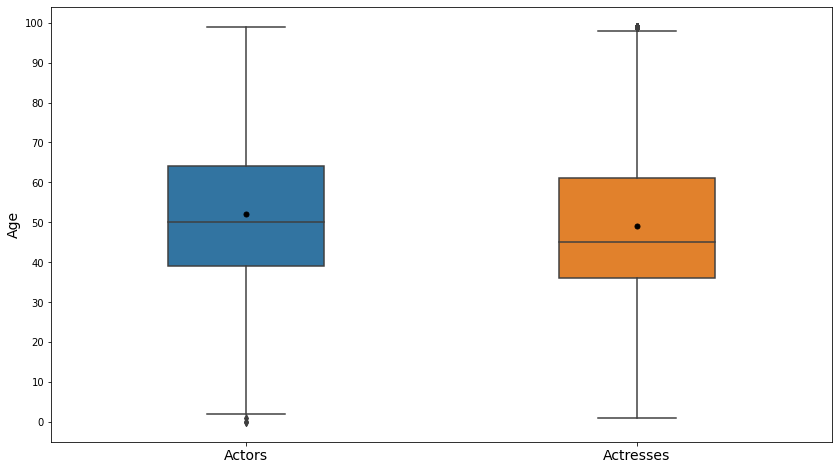

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
# df_birthYear_actors.drop(columns = 'birthYear', inplace = True)
# df_birthYear_actresses.drop(columns = 'birthYear', inplace = True)
df_birthYear_actors.rename(columns={'age':'Actors'}, inplace = True)
df_birthYear_actresses.rename(columns= {'age':'Actresses'}, inplace = True)
df_birthYear_merged = pd.DataFrame(data = df_birthYear_actresses, columns = ['Actresses'])
df_birthYear_merged_final = pd.concat([df_birthYear_actors, df_birthYear_actresses])
df_birthYear_merged_final

ax = sns.boxplot(data = df_birthYear_merged_final, showmeans = True, width = 0.4, meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black","markersize":"5"})
ax.set_ylabel('Age', size = 14)
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70 ,80, 90, 100])
ax.set_xticklabels(['Actors', 'Actresses'], size = 14)
plt.show()

# **Compressing**

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
# compression_opts = dict(method='zip', archive_name='namebasicscheck.csv')

In [ ]:
# name_basics.to_csv("/content/drive/MyDrive/International Football/namebasicscheck.zip",index = False, compression = compression_opts)

In [ ]:
# name_basics.to_csv("/content/drive/MyDrive/International Football/namebasicscheck.csv",index = False, compression = compression_opts)